# Covid-19 Analysis - India

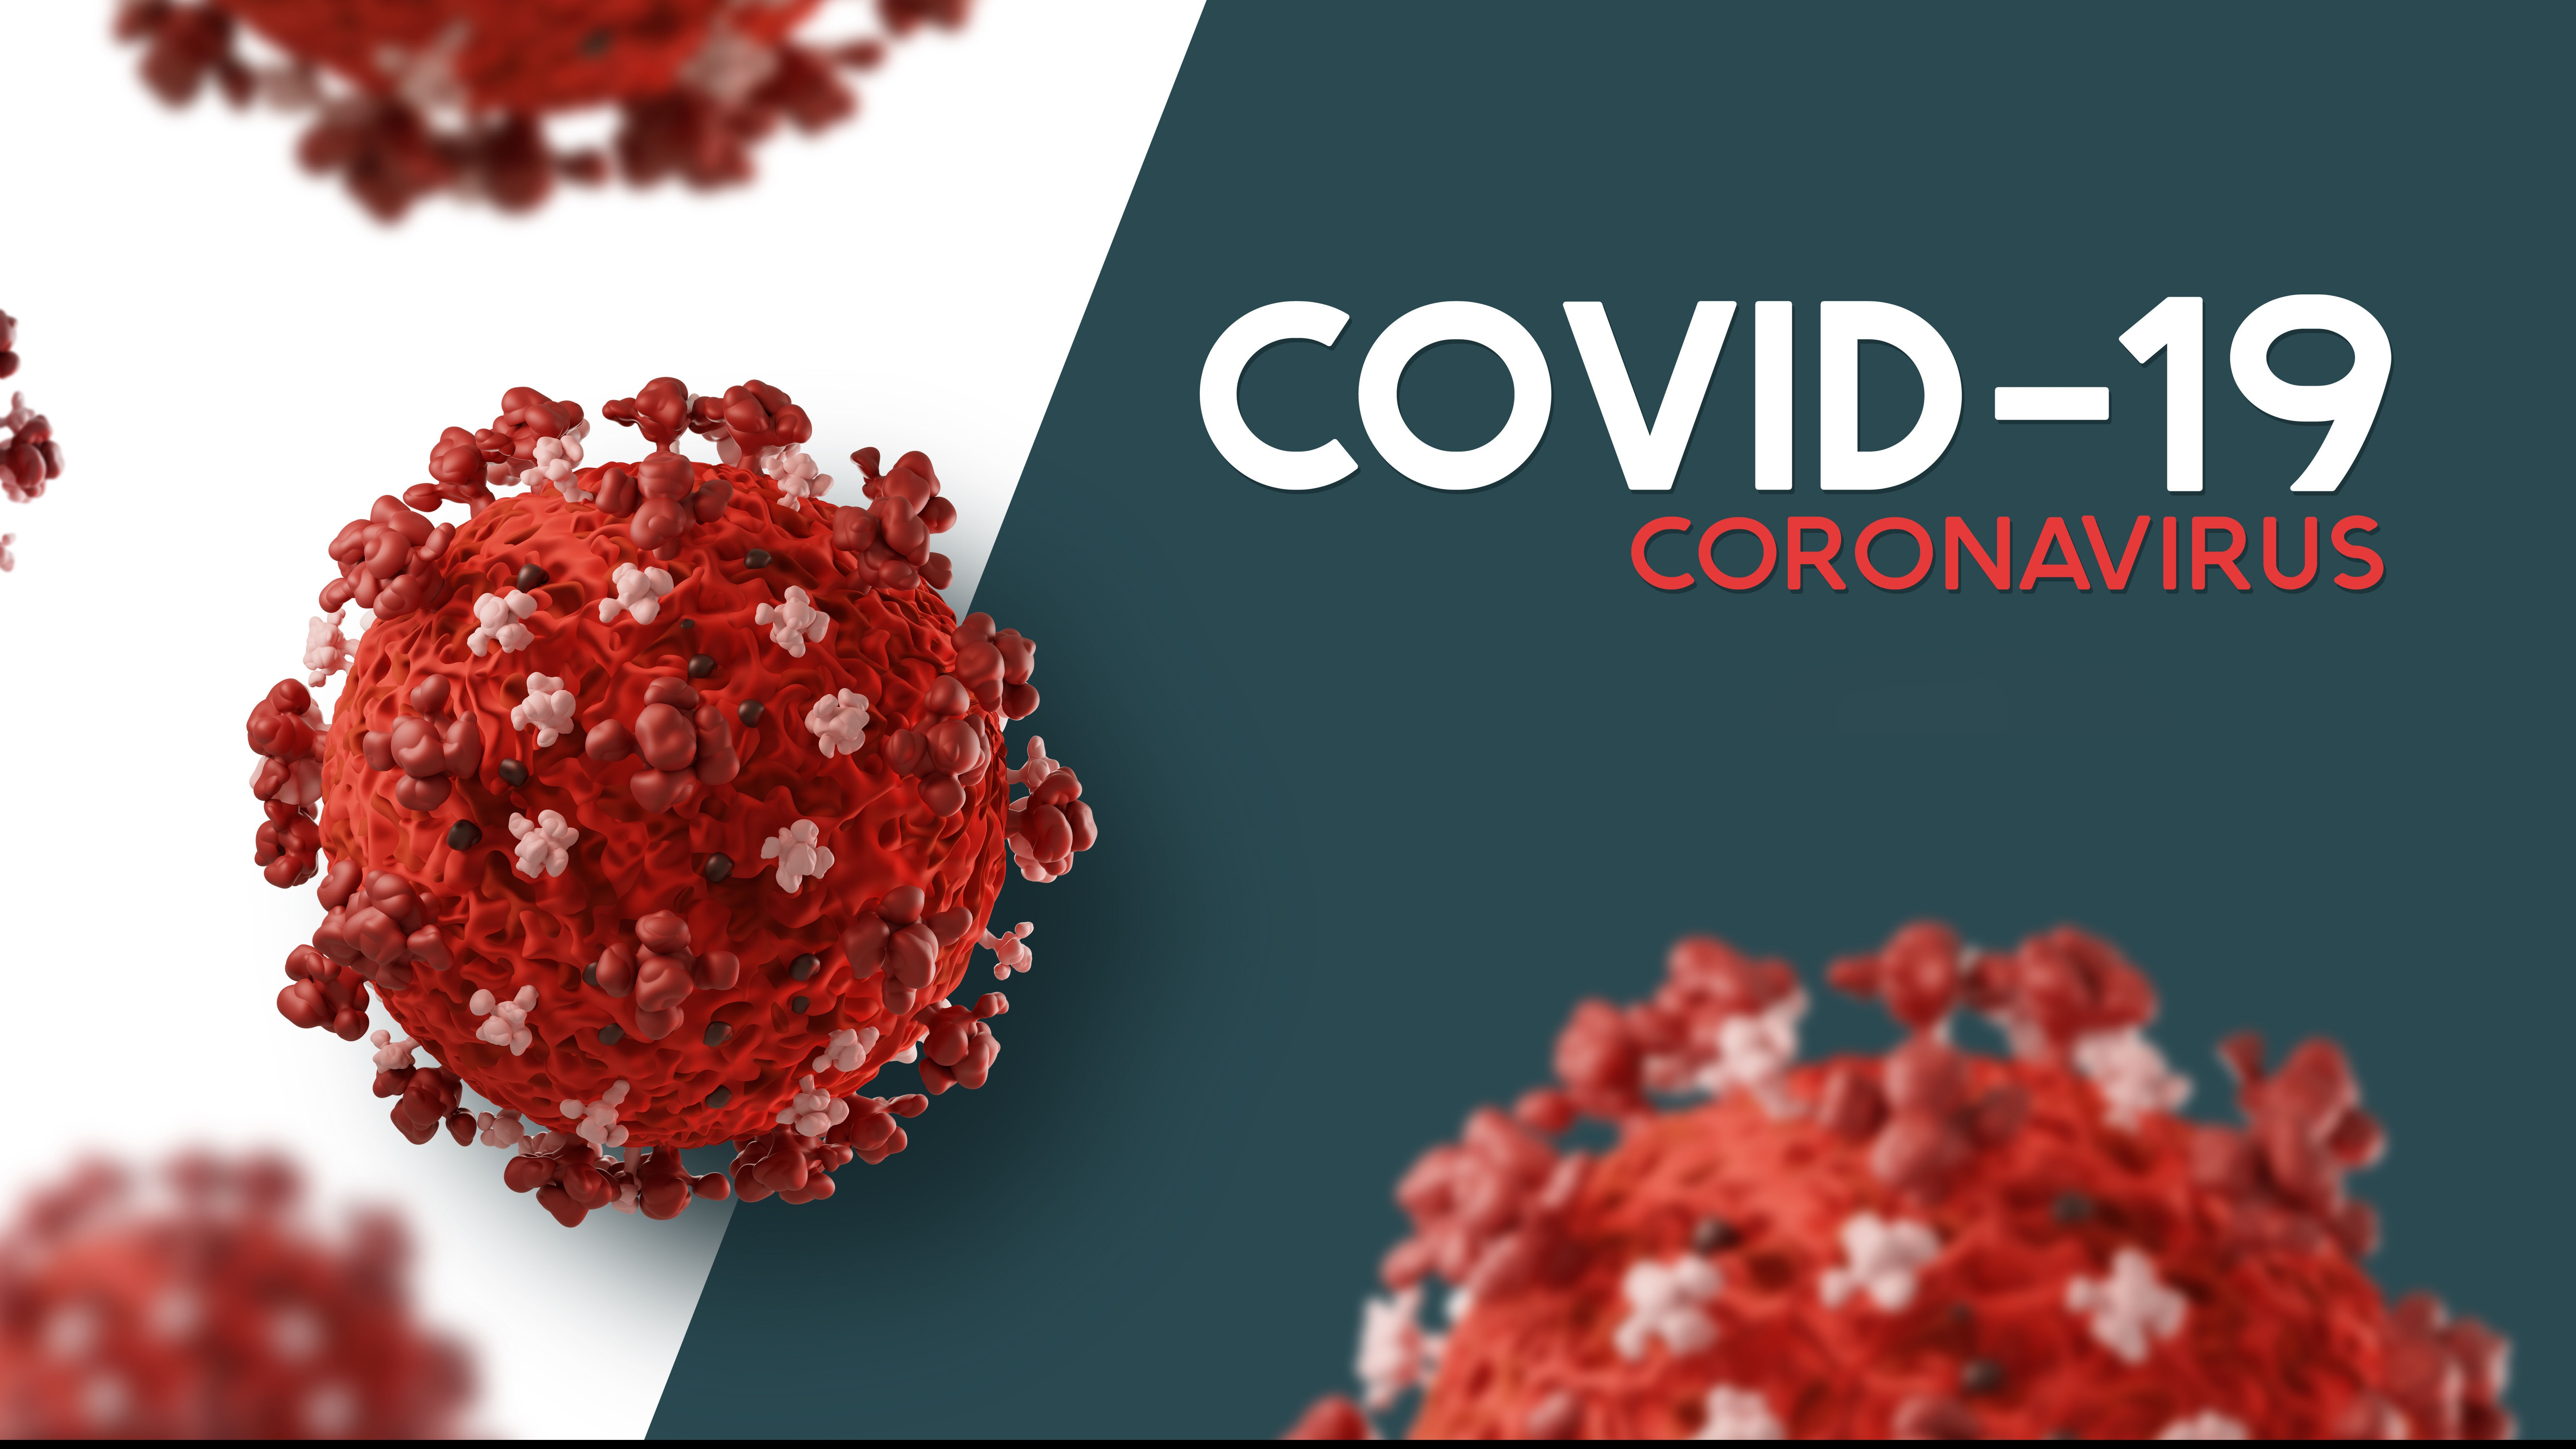

In [1]:
from IPython.display import Image, HTML
Image(filename='./Covid-19 Image.jpg',width=600, height=300) 

## Introduction

In the midst of the ongoing global health crisis, the need for data-driven insights and analysis has never been more pressing

-  The COVID-19 pandemic has underscored the importance of harnessing data to understand, respond to, and mitigate the impact of the virus
-  This project serves as a critical exploration into the realm of data science, where we aim to unlock valuable insights from the extensive dataset of COVID-19 cases in Indiaemerge from this analysis.

#### The Need for this Project
The emergence of the COVID-19 pandemic in late 2019 prompted a worldwide scramble for information and understanding. While information abounds, deciphering and visualizing the data can be complex, yet crucial. This project addresses the following key needs:

1. Data-Driven Decision-Making
The project empowers stakeholders, policymakers, and healthcare professionals with the ability to make informed decisions based on real-time data. By analyzing and visualizing the COVID-19 dataset, we gain insights that can guide response strategies and resource allocation.

2. Research Points :
   The project hones in on several critical research points:
    - Regional Variation: Understanding the disparities in COVID-19 impact across Indian states and union territories.
    - Temporal Trends: Examining the progression of the pandemic over a two-year period.
    - Impact on Healthcare Infrastructure: Assessing the strain on healthcare systems.
    - Vaccination Coverage: Evaluating the impact of vaccination campaigns.
      
4. Visual Data Analysis
Through the use of data visualization techniques, this project translates complex data into digestible visuals. These visuals are essential in conveying information and trends to a broader audience and facilitating comprehension.

5. Future Preparedness
Lessons learned from this project can guide future pandemic preparedness. By analyzing historical data, we can identify strategies and interventions that were effective and those that need improvement.


#### Utilizing Python and Data Science Tools
Python, as a versatile programming language, serves as the foundation of this project. Python's data science ecosystem, encompassing libraries such as Pandas, NumPy, Seaborn, and Matplotlib, provides the necessary tools for data analysis and visualization. The combination of Python's simplicity and the extensive libraries available makes it the preferred choice for this project.

#### Conclusion
This project represents a concerted effort to harness data for a greater purpose. By scrutinizing the extensive COVID-19 dataset in India, we aim to contribute to the ongoing discourse on public health, crisis response, and data-driven decision-making. The following sections will delve into the technical aspects of data analysis and visualization, shedding light on the insights that emerge from this analysis.

In this project I am using Kaggle for extracting the dataset for the project. We need our Kaggle Username and API Id for downloading the dataset to our notebook.

## Downloading the Dataset

In [2]:
!pip install jovian opendatasets --upgrade --quiet

In [3]:
dataset_url = 'https://www.kaggle.com/datasets/sudalairajkumar/covid19-in-india'

In [4]:
# !pip install dataset

In [5]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in ".\covid19-in-india" (use force=True to force download)


In [6]:
data_dir = "./covid19-in-india"

The downloaded folder contains 3 CSV Files. In this Project we will be working with first file only. i.e., "covid_19_india.csv"

In [7]:
import os
os.listdir(data_dir)

['covid_19_india.csv',
 'covid_vaccine_statewise.csv',
 'StatewiseTestingDetails.csv']

## Data Cleaning

The dataset we downloaded is still not ready for exploratory analysis and visualization! Our dataset might contain some null values, some unnecessary data, irrelevant information etc. In order to get rid of these we'll use Pandas and Numpy.

In [8]:
import numpy as np
import pandas as pd

In [9]:
covid_df = pd.read_csv(data_dir + '/covid_19_india.csv')

In [10]:
covid_df

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30-01-2020,6:00 PM,Kerala,1,0,0,0,1
1,2,31-01-2020,6:00 PM,Kerala,1,0,0,0,1
2,3,01-02-2020,6:00 PM,Kerala,2,0,0,0,2
3,4,02-02-2020,6:00 PM,Kerala,3,0,0,0,3
4,5,03-02-2020,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
18105,18106,11-08-2021,8:00 AM,Telangana,-,-,638410,3831,650353
18106,18107,11-08-2021,8:00 AM,Tripura,-,-,77811,773,80660
18107,18108,11-08-2021,8:00 AM,Uttarakhand,-,-,334650,7368,342462
18108,18109,11-08-2021,8:00 AM,Uttar Pradesh,-,-,1685492,22775,1708812


In [11]:
# Dropping serial no column i.e., 'Sno' and Time Column
covid_df.drop('Sno', axis=1, inplace=True)
covid_df.drop('Time', axis=1, inplace=True)

# Dropping 3 rows namely "Dadra and Nagar Haveli", "Unassigned", "Daman & Diu, for the clean visualization pupose. Also, the data of these 3 rows is insignificant as compared to rest table
# List of state values to delete
states_to_delete = ["Dadra and Nagar Haveli", "Unassigned", "Daman & Diu"]

# Use the drop method to delete rows with specified state values in place
covid_df.drop(covid_df[covid_df["State/UnionTerritory"].isin(states_to_delete)].index, inplace=True)

In [12]:
# getting information of our dataset
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18104 entries, 0 to 18109
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Date                      18104 non-null  object
 1   State/UnionTerritory      18104 non-null  object
 2   ConfirmedIndianNational   18104 non-null  object
 3   ConfirmedForeignNational  18104 non-null  object
 4   Cured                     18104 non-null  int64 
 5   Deaths                    18104 non-null  int64 
 6   Confirmed                 18104 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 1.1+ MB


In [13]:
#getting statistical information of our dataset
covid_df.describe()

,Cured,Deaths,Confirmed
count,1.810400e+04,18104.000000,1.810400e+04
mean,2.787287e+05,4053.744863,3.011300e+05
std,6.149724e+05,10920.636637,6.562352e+05
min,0.000000e+00,0.000000,0.000000e+00
25%,3.361750e+03,33.000000,4.381750e+03
50%,3.341800e+04,589.000000,3.982050e+04
75%,2.789350e+05,3644.750000,3.002002e+05
max,6.159676e+06,134201.000000,6.363442e+06


.describe() and .info() are two pandas methods that are used to get valuable insights of the dataset.

In [14]:
#checking whether there is a null value or not
covid_df.isnull().sum()

Date                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

Luckily there are 0 null values! (But if there were null values we need to remove that using 'fillna' or 'dropna' methods)

In [15]:
# taking care of '-'
covid_df.replace(to_replace ='-', value=0, inplace=True)

In [16]:
# Changing datatype - dtype

covid_df['Date'] = pd.to_datetime(covid_df['Date'])
covid_df['State/UnionTerritory'] = covid_df['State/UnionTerritory'].astype('string')
covid_df['ConfirmedIndianNational'] = covid_df['ConfirmedIndianNational'].astype('int')
covid_df['ConfirmedForeignNational'] = covid_df['ConfirmedForeignNational'].astype('int')

C:\Users\RAVI\AppData\Local\Temp\ipykernel_12632\1806882347.py:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  covid_df['Date'] = pd.to_datetime(covid_df['Date'])


In [17]:
# There are state names with 'Bihar' and 'Bihar***' in the CSV file, let's clean that
covid_df['State/UnionTerritory'] = covid_df['State/UnionTerritory'].str.replace(r'\*+', '', regex=True)

In [18]:
# Drop rows where 'State/UnionTerritory' is 'Cases being reassigned to states' in place
covid_df.drop(covid_df[covid_df['State/UnionTerritory'] == 'Cases being reassigned to states'].index, inplace=True)

In [19]:
# checking dtypes
covid_df.dtypes

Date                        datetime64[ns]
State/UnionTerritory        string[python]
ConfirmedIndianNational              int32
ConfirmedForeignNational             int32
Cured                                int64
Deaths                               int64
Confirmed                            int64
dtype: object

In [20]:
# Checking Tail
covid_df.tail()

,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
18105,2021-08-11,Telangana,0,0,638410,3831,650353
18106,2021-08-11,Tripura,0,0,77811,773,80660
18107,2021-08-11,Uttarakhand,0,0,334650,7368,342462
18108,2021-08-11,Uttar Pradesh,0,0,1685492,22775,1708812
18109,2021-08-11,West Bengal,0,0,1506532,18252,1534999


# Analysis and Visualization

As we've complete data cleaning, now we'll derive some valuable insights from our data and plot it using Matplotlib and Seaborn.

Let's begin by importingmatplotlib.pyplot and seaborn

In [21]:
# !pip install plotly-express

In [22]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline    

#With the last command, the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it. 

In [23]:
# Customizing Matplotlib with style sheets and rcParams

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Top 10 Days when the case were at Peak

In [24]:
covid_df.nlargest(n=10, columns=['Confirmed'])

,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
18094,2021-08-11,Maharashtra,0,0,6159676,134201,6363442
18058,2021-08-10,Maharashtra,0,0,6151956,134064,6357833
18022,2021-08-09,Maharashtra,0,0,6144388,133996,6353328
17986,2021-08-08,Maharashtra,0,0,6139493,133845,6347820
17950,2021-08-07,Maharashtra,0,0,6130137,133717,6341759
17914,2021-08-06,Maharashtra,0,0,6124278,133530,6336220
17878,2021-08-05,Maharashtra,0,0,6117560,133410,6327194
17842,2021-08-04,Maharashtra,0,0,6110124,133215,6321068
17806,2021-08-03,Maharashtra,0,0,6103325,133038,6315063
17770,2021-08-02,Maharashtra,0,0,6094896,132948,6310194


# List of States and Union Territories included in the dataset

In [25]:
covid_df['State/UnionTerritory'].unique()

<StringArray>
[                                  'Kerala',
                                'Telengana',
                                    'Delhi',
                                'Rajasthan',
                            'Uttar Pradesh',
                                  'Haryana',
                                   'Ladakh',
                               'Tamil Nadu',
                                'Karnataka',
                              'Maharashtra',
                                   'Punjab',
                        'Jammu and Kashmir',
                           'Andhra Pradesh',
                              'Uttarakhand',
                                   'Odisha',
                               'Puducherry',
                              'West Bengal',
                             'Chhattisgarh',
                               'Chandigarh',
                                  'Gujarat',
                         'Himachal Pradesh',
                           'Madhya Prades

# Top N State and Union Territories with the cases on a Particular Day

In [26]:
# Get user input for date in format :
# user_date = input("Enter the date (in YYYY-MM-DD format): ")
user_date = '2021-01-01'

# Filter the data
selected_data = covid_df[(covid_df['Date'] == user_date)]

# Printing selected data
selected_data

,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
10082,2021-01-01,Andhra Pradesh,0,0,871916,7108,882286
10083,2021-01-01,Andaman and Nicobar Islands,0,0,4826,62,4945
10084,2021-01-01,Arunachal Pradesh,0,0,16564,56,16719
10085,2021-01-01,Assam,0,0,211910,1045,216211
10086,2021-01-01,Bihar,0,0,245476,1397,251743
10087,2021-01-01,Chandigarh,0,0,19045,317,19748
10088,2021-01-01,Chhattisgarh,0,0,264769,3371,279575
10089,2021-01-01,Dadra and Nagar Haveli and Daman and Diu,0,0,3365,2,3378
10090,2021-01-01,Delhi,0,0,609322,10536,625369
10091,2021-01-01,Goa,0,0,49388,739,51066


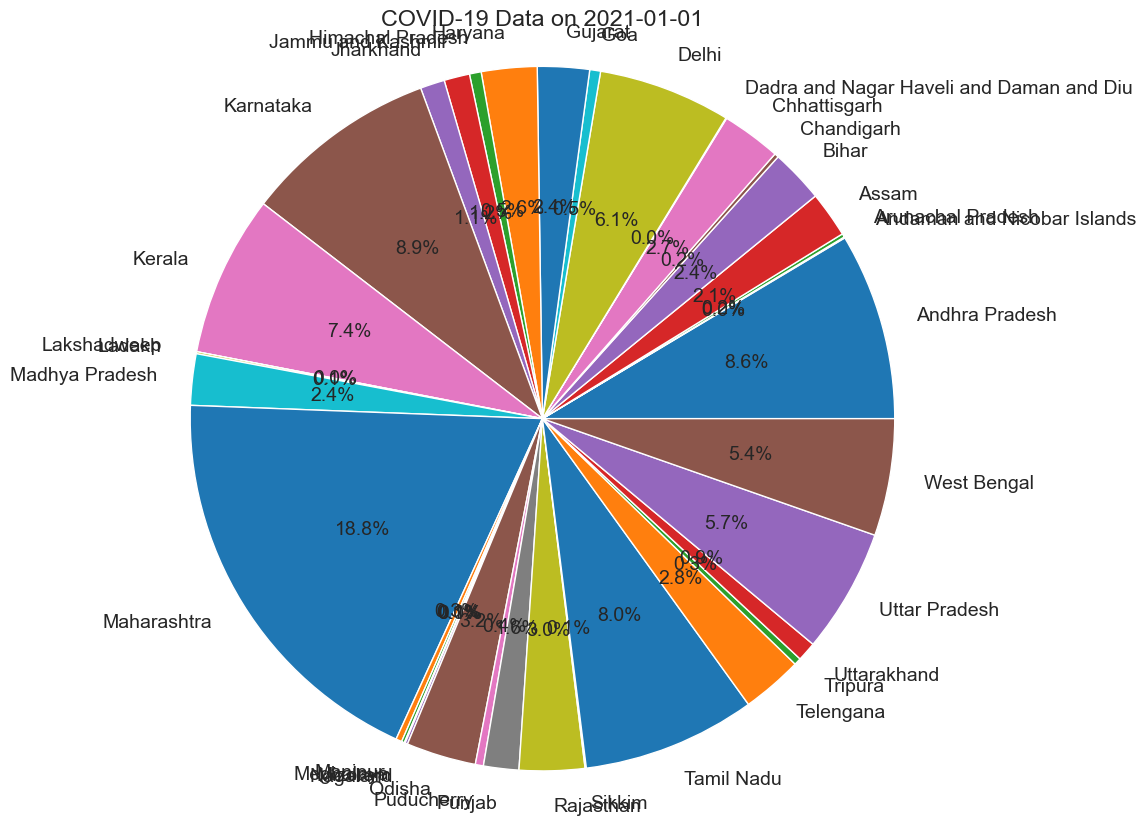

In [27]:
# Check if there's any data for the selected date
if selected_data.empty:
    print(f"No data found for the selected date: {user_date}")
else:
    # Create a pie chart
    total_confirmed = selected_data['Confirmed'].sum()
    labels = selected_data['State/UnionTerritory']
    sizes = selected_data['Confirmed'] / total_confirmed

    # Create the pie chart
    plt.figure(figsize=(10, 10))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%')   #autopct : used to label the wedges with their numeric value
    plt.title(f'COVID-19 Data on {user_date}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    # Display the pie chart
    plt.show()

## To visualize it better, let's plot only 'Top N states' with confirmed cases

In [28]:
#Get user input for date and N (number of top states)
# user_date = input("Enter the date (in YYYY-MM-DD format): ")
user_date = '2021-01-01'

#user_N = int(input("Enter the number of top states to display in the pie chart: "))

user_N = 10

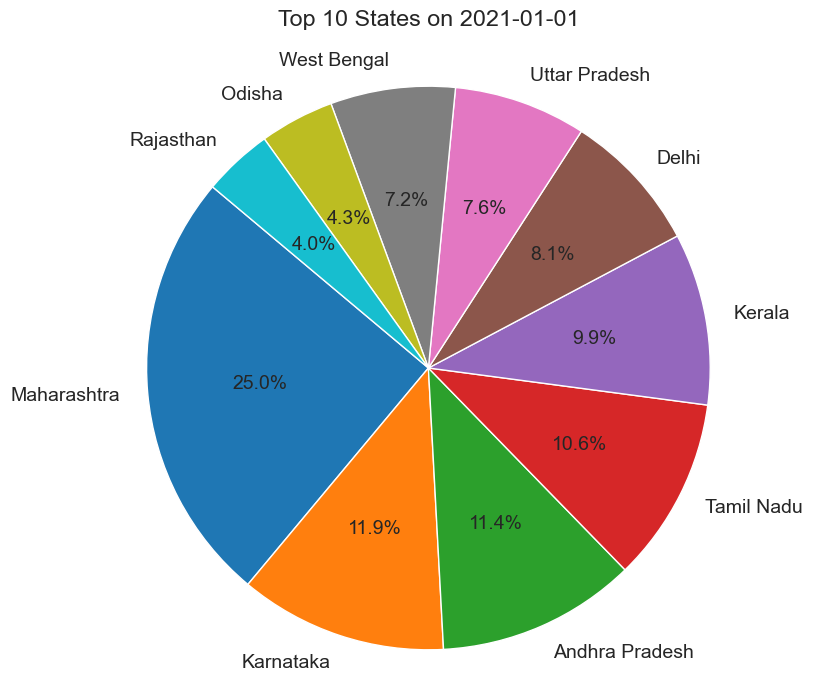

In [29]:
# Filter the data for the selected date
selected_data = covid_df[(covid_df['Date'] == user_date)]

# Check if there's any data for the selected date
if selected_data.empty:
    print(f"No data found for the selected date: {user_date}")
else:
    # Sort the data by Confirmed cases and select the top N states
    selected_data = selected_data.nlargest(user_N, 'Confirmed')

    # Calculate the total confirmed cases for the top N states
    total_confirmed = selected_data['Confirmed'].sum()

    # Create the pie chart
    labels = selected_data['State/UnionTerritory']
    sizes = selected_data['Confirmed'] / total_confirmed

    # Create the pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title(f'Top {user_N} States on {user_date}', pad=25)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    # Display the pie chart
    plt.show()

#  Visualize the progression of COVID-19 cases, deaths, or recoveries over time.

In [30]:
# state_name = input("Enter the State name : ")
state_name = 'Haryana'

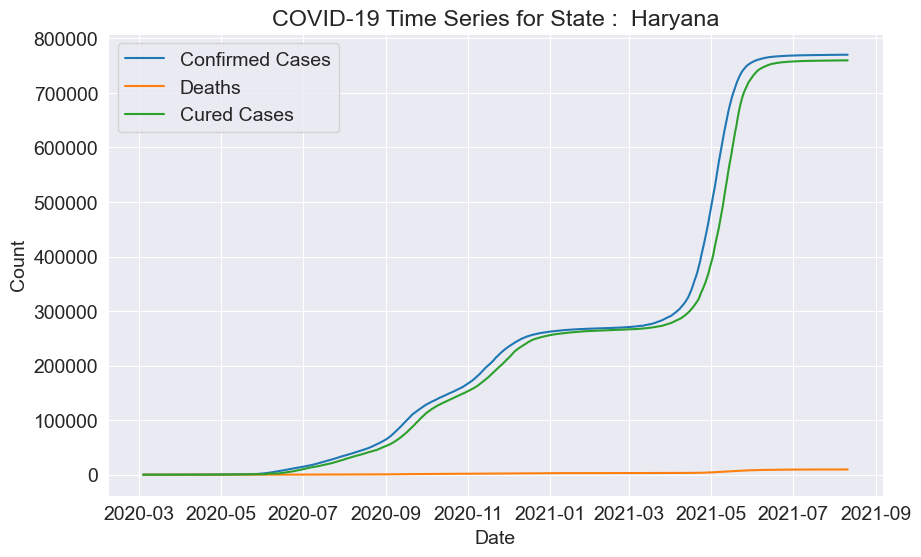

In [31]:
# Filter data for a specific state
state_data = covid_df[covid_df['State/UnionTerritory'] == state_name]

# Plot time series for Confirmed, Deaths, and Cured
plt.figure(figsize=(10, 6))
plt.plot(state_data['Date'], state_data['Confirmed'], label='Confirmed Cases')
plt.plot(state_data['Date'], state_data['Deaths'], label='Deaths')
plt.plot(state_data['Date'], state_data['Cured'], label='Cured Cases')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title(f'COVID-19 Time Series for State :  {state_name}')
plt.legend()
plt.show()

# Bar charts to compare metrics across different State/UnionTerritory on a Particular Day

In [32]:
# N = input("Enter the no of States : ")
N = 7

user_date = '2021-01-01'  # Replace with your desired date in 'YYYY-MM-DD' format

<Figure size 1200x600 with 0 Axes>

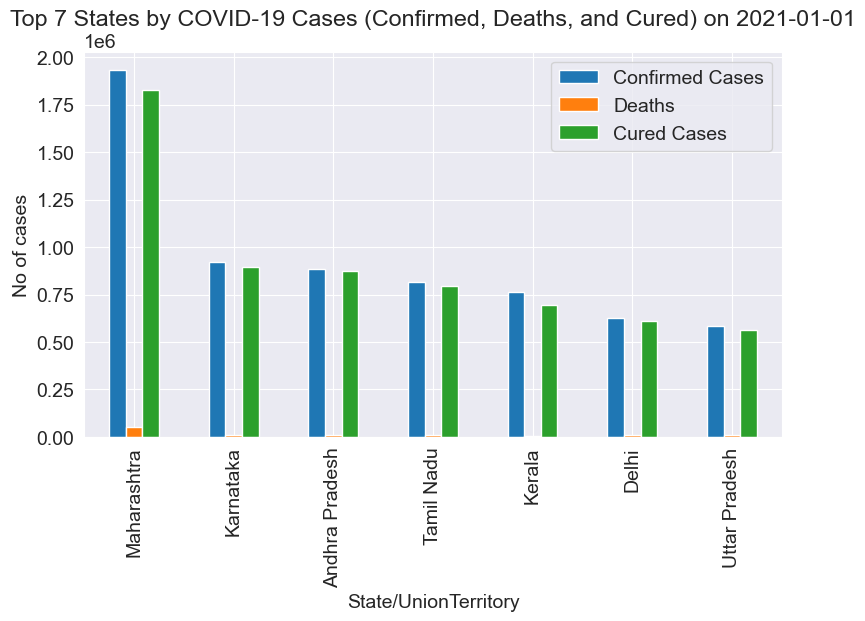

In [33]:
# Filter the data for the selected date
data_for_selected_date = covid_df[covid_df['Date'] == user_date]

# Check if there is data for the selected date
if not data_for_selected_date.empty:
    # Group data by 'State/UnionTerritory' and calculate the sum for 'Confirmed', 'Deaths', and 'Cured' columns
    state_totals = data_for_selected_date.groupby('State/UnionTerritory')[['Confirmed', 'Deaths', 'Cured']].sum()

    # Sort the data to find the top N states
    top_states = state_totals.nlargest(N, 'Confirmed')

    # Plot a bar chart for Confirmed, Deaths, and Cured for the top N states on the selected date
    plt.figure(figsize=(12, 6))
    top_states.plot(kind='bar')
    plt.xlabel('State/UnionTerritory')
    plt.ylabel('No of cases')
    plt.title(f'Top {N} States by COVID-19 Cases (Confirmed, Deaths, and Cured) on {user_date}')
    plt.legend(["Confirmed Cases", "Deaths", "Cured Cases"])
    plt.show()
else:
    print(f"No data found for the selected date: {user_date}")

# Box Plot of COVID-19 cases by state

Box: The box itself represents the interquartile range (IQR), which is the middle 50% of the data. The bottom edge of the box is the first quartile (Q1), and the top edge of the box is the third quartile (Q3). The height of the box (Q3 - Q1) indicates the spread of the middle 50% of the data.

Line Inside the Box: The line inside the box represents the median (Q2), which is the middle value of the data. It's the point where 50% of the data falls below and 50% falls above.

Whiskers: The "whiskers" extending from the box indicate the range of the data. These whiskers typically extend to the minimum and maximum values within a certain range. Any data points beyond the whiskers are considered potential outliers and are plotted individually as points.

Outliers: Data points that are considered outliers, i.e., they fall outside the range represented by the whiskers, are plotted individually as points. These outliers are typically values that significantly deviate from the majority of data. data.

By looking at the box plot, you can gain insights into the distribution of COVID-19 cases in different states. It allows you to compare the central tendency (median) and spread (IQR) of cases among states and identify any potential outliers, which may represent states with significantly higher or lower cases than the rest. This type of plot is useful for visualizing and comparing the distribution of data across multiple categories, such as states in this case.

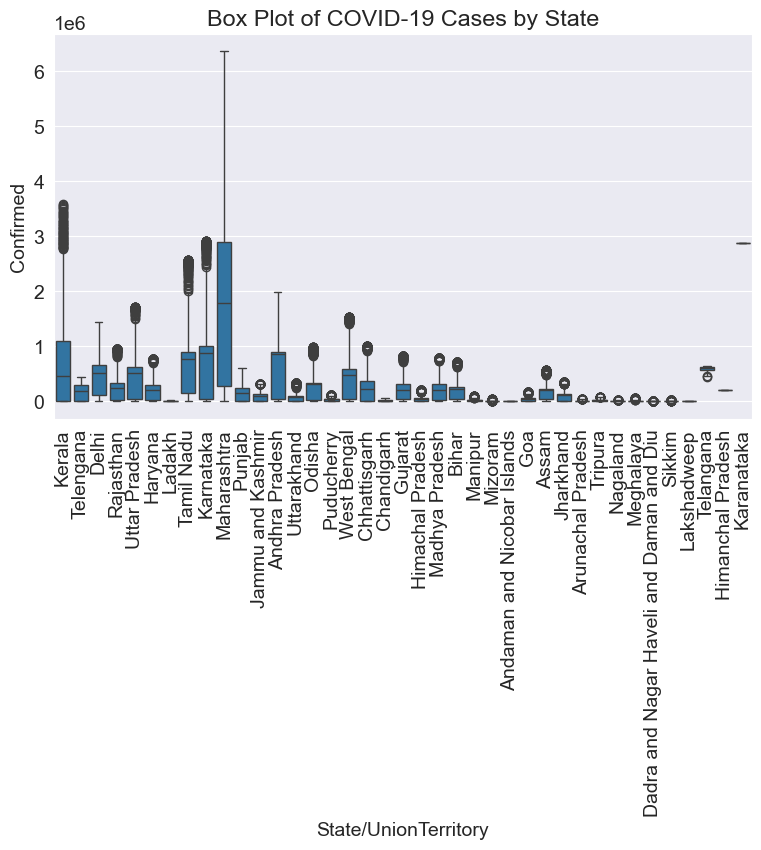

In [34]:
import seaborn as sns

# Box plots for COVID-19 cases or deaths
sns.boxplot(data=covid_df, x="State/UnionTerritory", y="Confirmed")
plt.xticks(rotation=90)
plt.title("Box Plot of COVID-19 Cases by State")
plt.show()

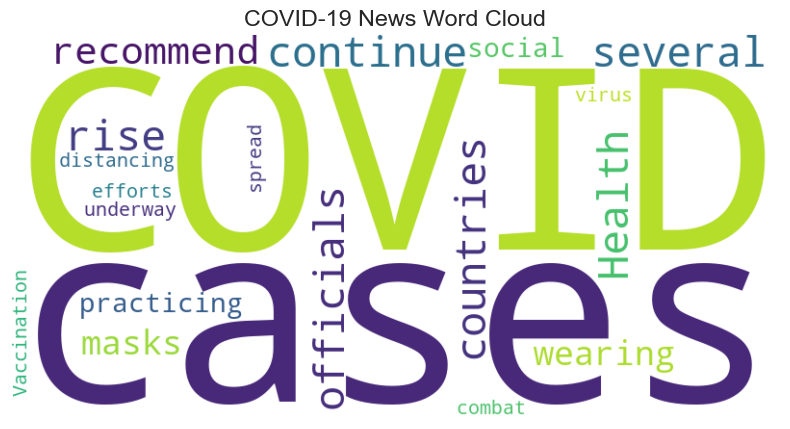

In [35]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define a list of news articles
news_articles = [
    "COVID-19 cases continue to rise in several countries...",
    "Health officials recommend wearing masks and practicing social distancing...",
    "Vaccination efforts are underway to combat the spread of the virus...",
    # Add more news articles here
]

# Concatenate the news articles into a single text string
text = " ".join(news_articles)

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("COVID-19 News Word Cloud")
plt.show()


# Answering questions based on the dataset

### Q1: Total No of cases, cured and deaths for each date in the whole duration of dataset?

In [36]:
# Group data by "State/UnionTerritory" and sum the values for each state
state_summary = covid_df.groupby("State/UnionTerritory")[["Cured", "Deaths", "Confirmed"]].sum()

# Display the resulting table (Sorted in descending order)
state_summary = state_summary.sort_values(by="Confirmed", ascending=False)
print(state_summary)

# Calculate the sum of all columns
total_summary = state_summary.sum()

# Print the sum of all columns
print("\nTotal Summary (Sum of All Columns):\n", total_summary)

                                               Cured    Deaths   Confirmed
State/UnionTerritory                                                      
Maharashtra                               1024765950  23868185  1127721063
Karnataka                                  441844360   6053762   485970693
Kerala                                     420174235   1888177   458906023
Tamil Nadu                                 404095807   5916658   431928644
Andhra Pradesh                             370426530   2939367   392432753
Uttar Pradesh                              291479351   4143450   312625843
Delhi                                      273419887   4943294   287227765
West Bengal                                247515102   3846989   263107876
Chhattisgarh                               151609364   2063920   163776262
Rajasthan                                  150356820   1473089   162369656
Odisha                                     150923455    790814   160130533
Gujarat                  

### Q2: Create a Bar Chart of the above data.

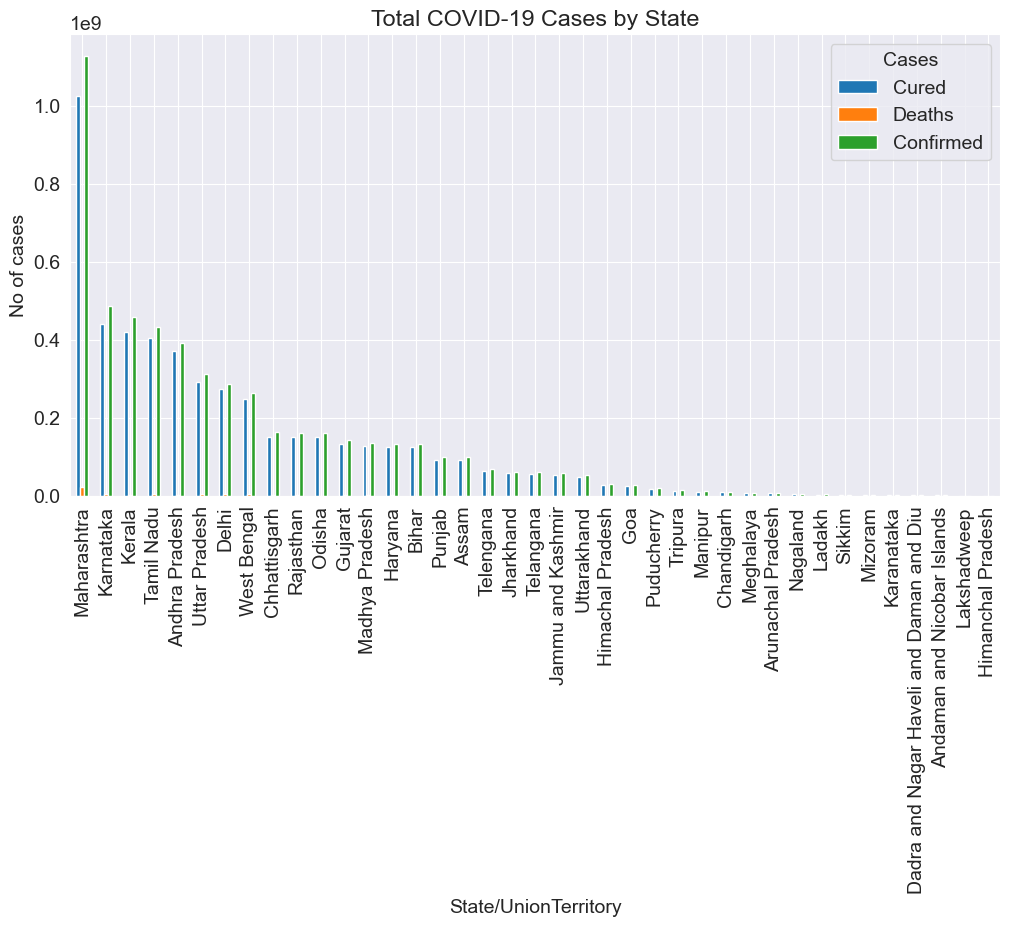

In [37]:
# Create a bar chart
state_summary.plot(kind="bar", figsize=(12, 6))

# Customize the chart
plt.title("Total COVID-19 Cases by State")
plt.xlabel("State/UnionTerritory")
plt.ylabel("No of cases")
plt.xticks(rotation=90)
plt.legend(title="Cases", loc="upper right")

# Display the chart
plt.show()

### Q3 : What was the first and last date of the dataset for which Covid-19 data is recorded?

In [38]:
# Find the first date (earliest date)
first_date = covid_df["Date"].min()

# Find the last date (latest date)
last_date = covid_df["Date"].max()

# Calculate the time difference
time_difference = last_date - first_date

# Extract the number of years and months
years = time_difference.days // 365
months = (time_difference.days % 365) // 30

# Print the results
print("First Date:", first_date)
print("Last Date:", last_date)
print("Data recorded for approximately", years, "years and", months, "months.")

First Date: 2020-01-30 00:00:00
Last Date: 2021-08-11 00:00:00
Data recorded for approximately 1 years and 6 months.


#### Q4: What was total no of cases per day in the whole nation?

In [39]:
covid_df_daily_total = covid_df.groupby("Date").sum()
covid_df_daily_total[[ 'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured','Deaths', 'Confirmed']]

,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
Date,,,,,
2020-01-30,1,0,0,0,1
2020-01-31,1,0,0,0,1
2020-02-01,2,0,0,0,2
2020-02-02,3,0,0,0,3
2020-02-03,3,0,0,0,3
...,...,...,...,...,...
2021-08-07,0,0,31055861,427371,31895385
2021-08-08,0,0,31099771,427862,31934455
2021-08-09,0,0,31139457,428309,31969954


#### Q5: What was the average no of cases per day in the whole nation?

In [40]:
covid_df_daily_mean = covid_df.groupby("Date")[[ 'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured','Deaths', 'Confirmed']].mean()
covid_df_daily_mean[[ 'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured','Deaths', 'Confirmed']]

,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
Date,,,,,
2020-01-30,1.0,0.0,0.000000,0.000000,1.000000
2020-01-31,1.0,0.0,0.000000,0.000000,1.000000
2020-02-01,2.0,0.0,0.000000,0.000000,2.000000
2020-02-02,3.0,0.0,0.000000,0.000000,3.000000
2020-02-03,3.0,0.0,0.000000,0.000000,3.000000
...,...,...,...,...,...
2021-08-07,0.0,0.0,862662.805556,11871.416667,885982.916667
2021-08-08,0.0,0.0,863882.527778,11885.055556,887068.194444
2021-08-09,0.0,0.0,864984.916667,11897.472222,888054.277778


#### Q6: Plot a Bar graphs showing the metrices (Month-Year-wise Data for Cured, Deaths, and Confirmed Cases) of whole nation.

In [41]:
# Ensure the 'Date' column is in datetime format
covid_df['Date'] = pd.to_datetime(covid_df['Date'])

# Create a new column for the month and year
covid_df['Month_Year'] = covid_df['Date'].dt.strftime('%b %Y')
    # dt.strftime('%b %Y') is used to format a date, typically stored as a datetime object, into a string with a specific format.

# Sort the 'Month_Year' column
covid_df['Month_Year'] = pd.to_datetime(covid_df['Month_Year'], format='%b %Y')
covid_df = covid_df.sort_values(by='Month_Year')

# Group the data by the 'Month_Year' and sum the values for 'Cured,' 'Deaths,' and 'Confirmed' for each month
monthly_data = covid_df.groupby('Month_Year')[['Cured', 'Deaths', 'Confirmed']].sum()

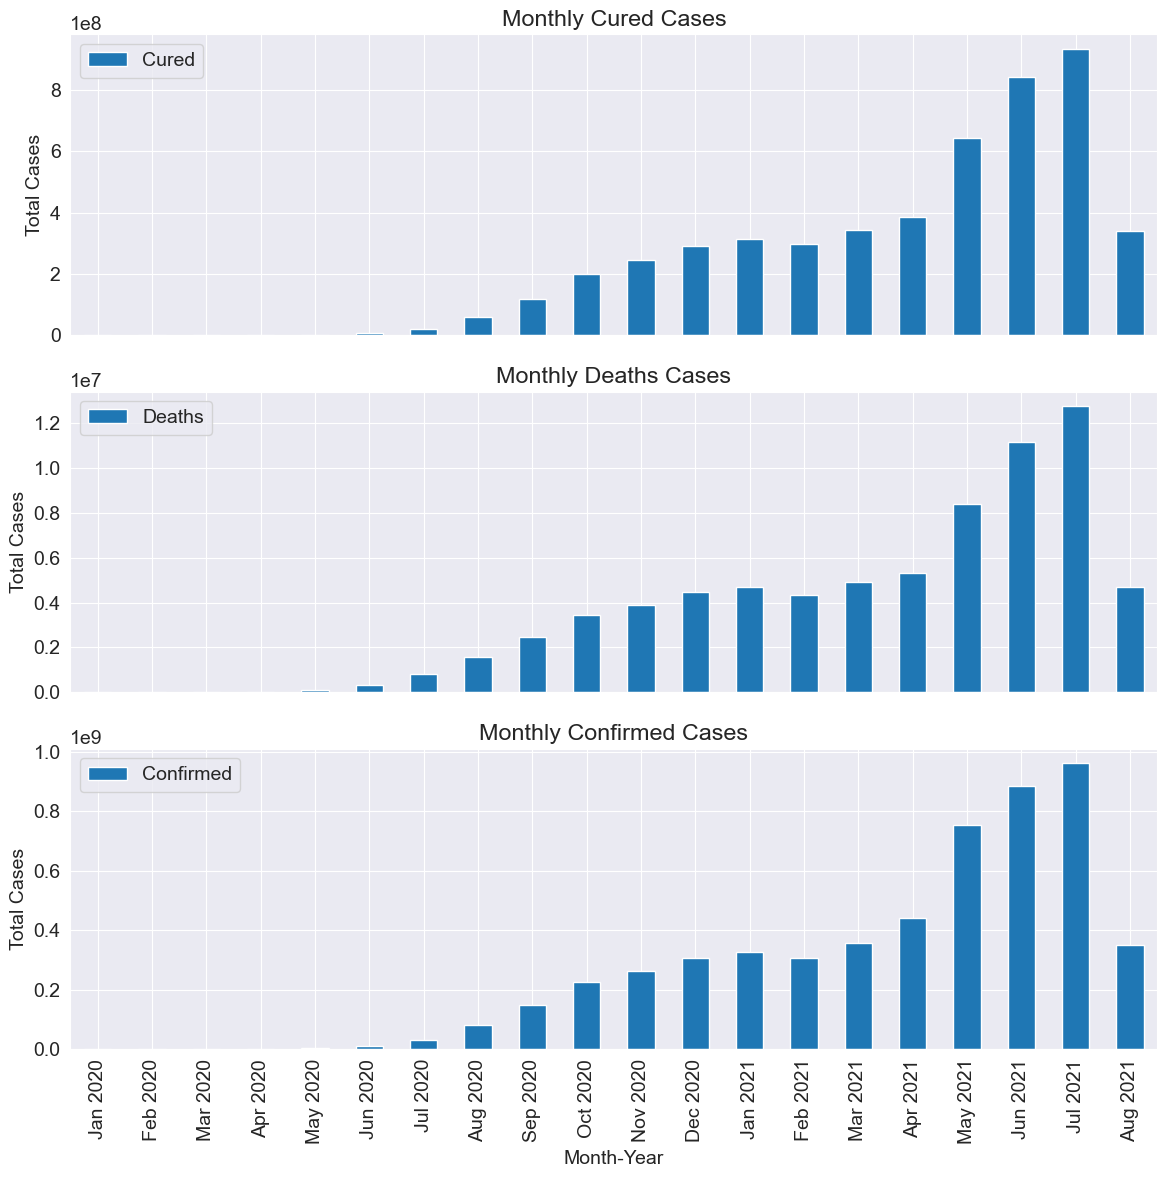

In [42]:
# Create separate subplots for each column
fig, axes = plt.subplots(3, 1, figsize=(12, 12), sharex=True)  
    # sharex parameter is set to True, which means that all subplots will share the same x-axis => Visually more appealing

# Plot 'Cured'
monthly_data['Cured'].plot(kind='bar', ax=axes[0])
axes[0].set_title('Monthly Cured Cases')
axes[0].set_ylabel('Total Cases')
axes[0].legend(['Cured'])

# Plot 'Deaths'
monthly_data['Deaths'].plot(kind='bar', ax=axes[1])
axes[1].set_title('Monthly Deaths Cases')
axes[1].set_ylabel('Total Cases')
axes[1].legend(['Deaths'])

# Plot 'Confirmed'
monthly_data['Confirmed'].plot(kind='bar', ax=axes[2])
axes[2].set_title('Monthly Confirmed Cases')
axes[2].set_xlabel('Month-Year')
axes[2].set_ylabel('Total Cases')
axes[2].legend(['Confirmed'])

# Format x-axis labels
month_labels = [month.strftime('%b %Y') for month in monthly_data.index]
plt.xticks(range(len(month_labels)), month_labels, rotation=45)
    # xticks is a function that is used to customize the appearance of the x-axis tick labels.

plt.xticks(rotation=90)  # Rotate the x-axis labels for readability
plt.tight_layout()
plt.show()

## Inferences and Conclusion

1. Maharashtra has maximum no of confirmed cases, cured cased and no of deaths
2. Himachal Pradesh has least no of cases
3. Islands like Andaman and Nicobar Islands and 
Lakshadweepalso encountered significant no of cases
4. **Geographical Variability**: The data reveals significant geographical variability in the impact of COVID-19 across Indian states and union territories. Some regions, such as Maharashtra, Karnataka, and Kerala, have experienced a higher burden of confirmed cases, recoveries, and deaths, while others have relatively lower numbers. 

## References

Links to resources I found useful while making this project:-

Pandas user guide

Matplotlib user guide

Seaborn user guide & tutorial

opendatasets Python library

Kaggle dataset

geeksforgeeks